In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path

BASE_DIR = Path(os.getcwd()).parent.parent

In [14]:
data_path = os.path.join(BASE_DIR, 'backend', 'data', 'processed', 'FEATURE_ENGINEERED_DATASET.csv')
data = pd.read_csv(data_path)

In [15]:
data['date'] = pd.to_datetime(data['date'])

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.dayofweek

data.drop(['date'], axis=1, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10943 entries, 0 to 10942
Data columns (total 66 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   load                                     10943 non-null  float64
 1   temperature_2m                           10943 non-null  float64
 2   apparent_temperature                     10943 non-null  float64
 3   relative_humidity_2m                     10943 non-null  float64
 4   vapour_pressure_deficit                  10943 non-null  float64
 5   pressure_msl                             10943 non-null  float64
 6   precipitation                            10943 non-null  float64
 7   cloud_cover                              10943 non-null  float64
 8   cloud_cover_low                          10943 non-null  float64
 9   cloud_cover_mid                          10943 non-null  float64
 10  cloud_cover_high                         10943

<Axes: >

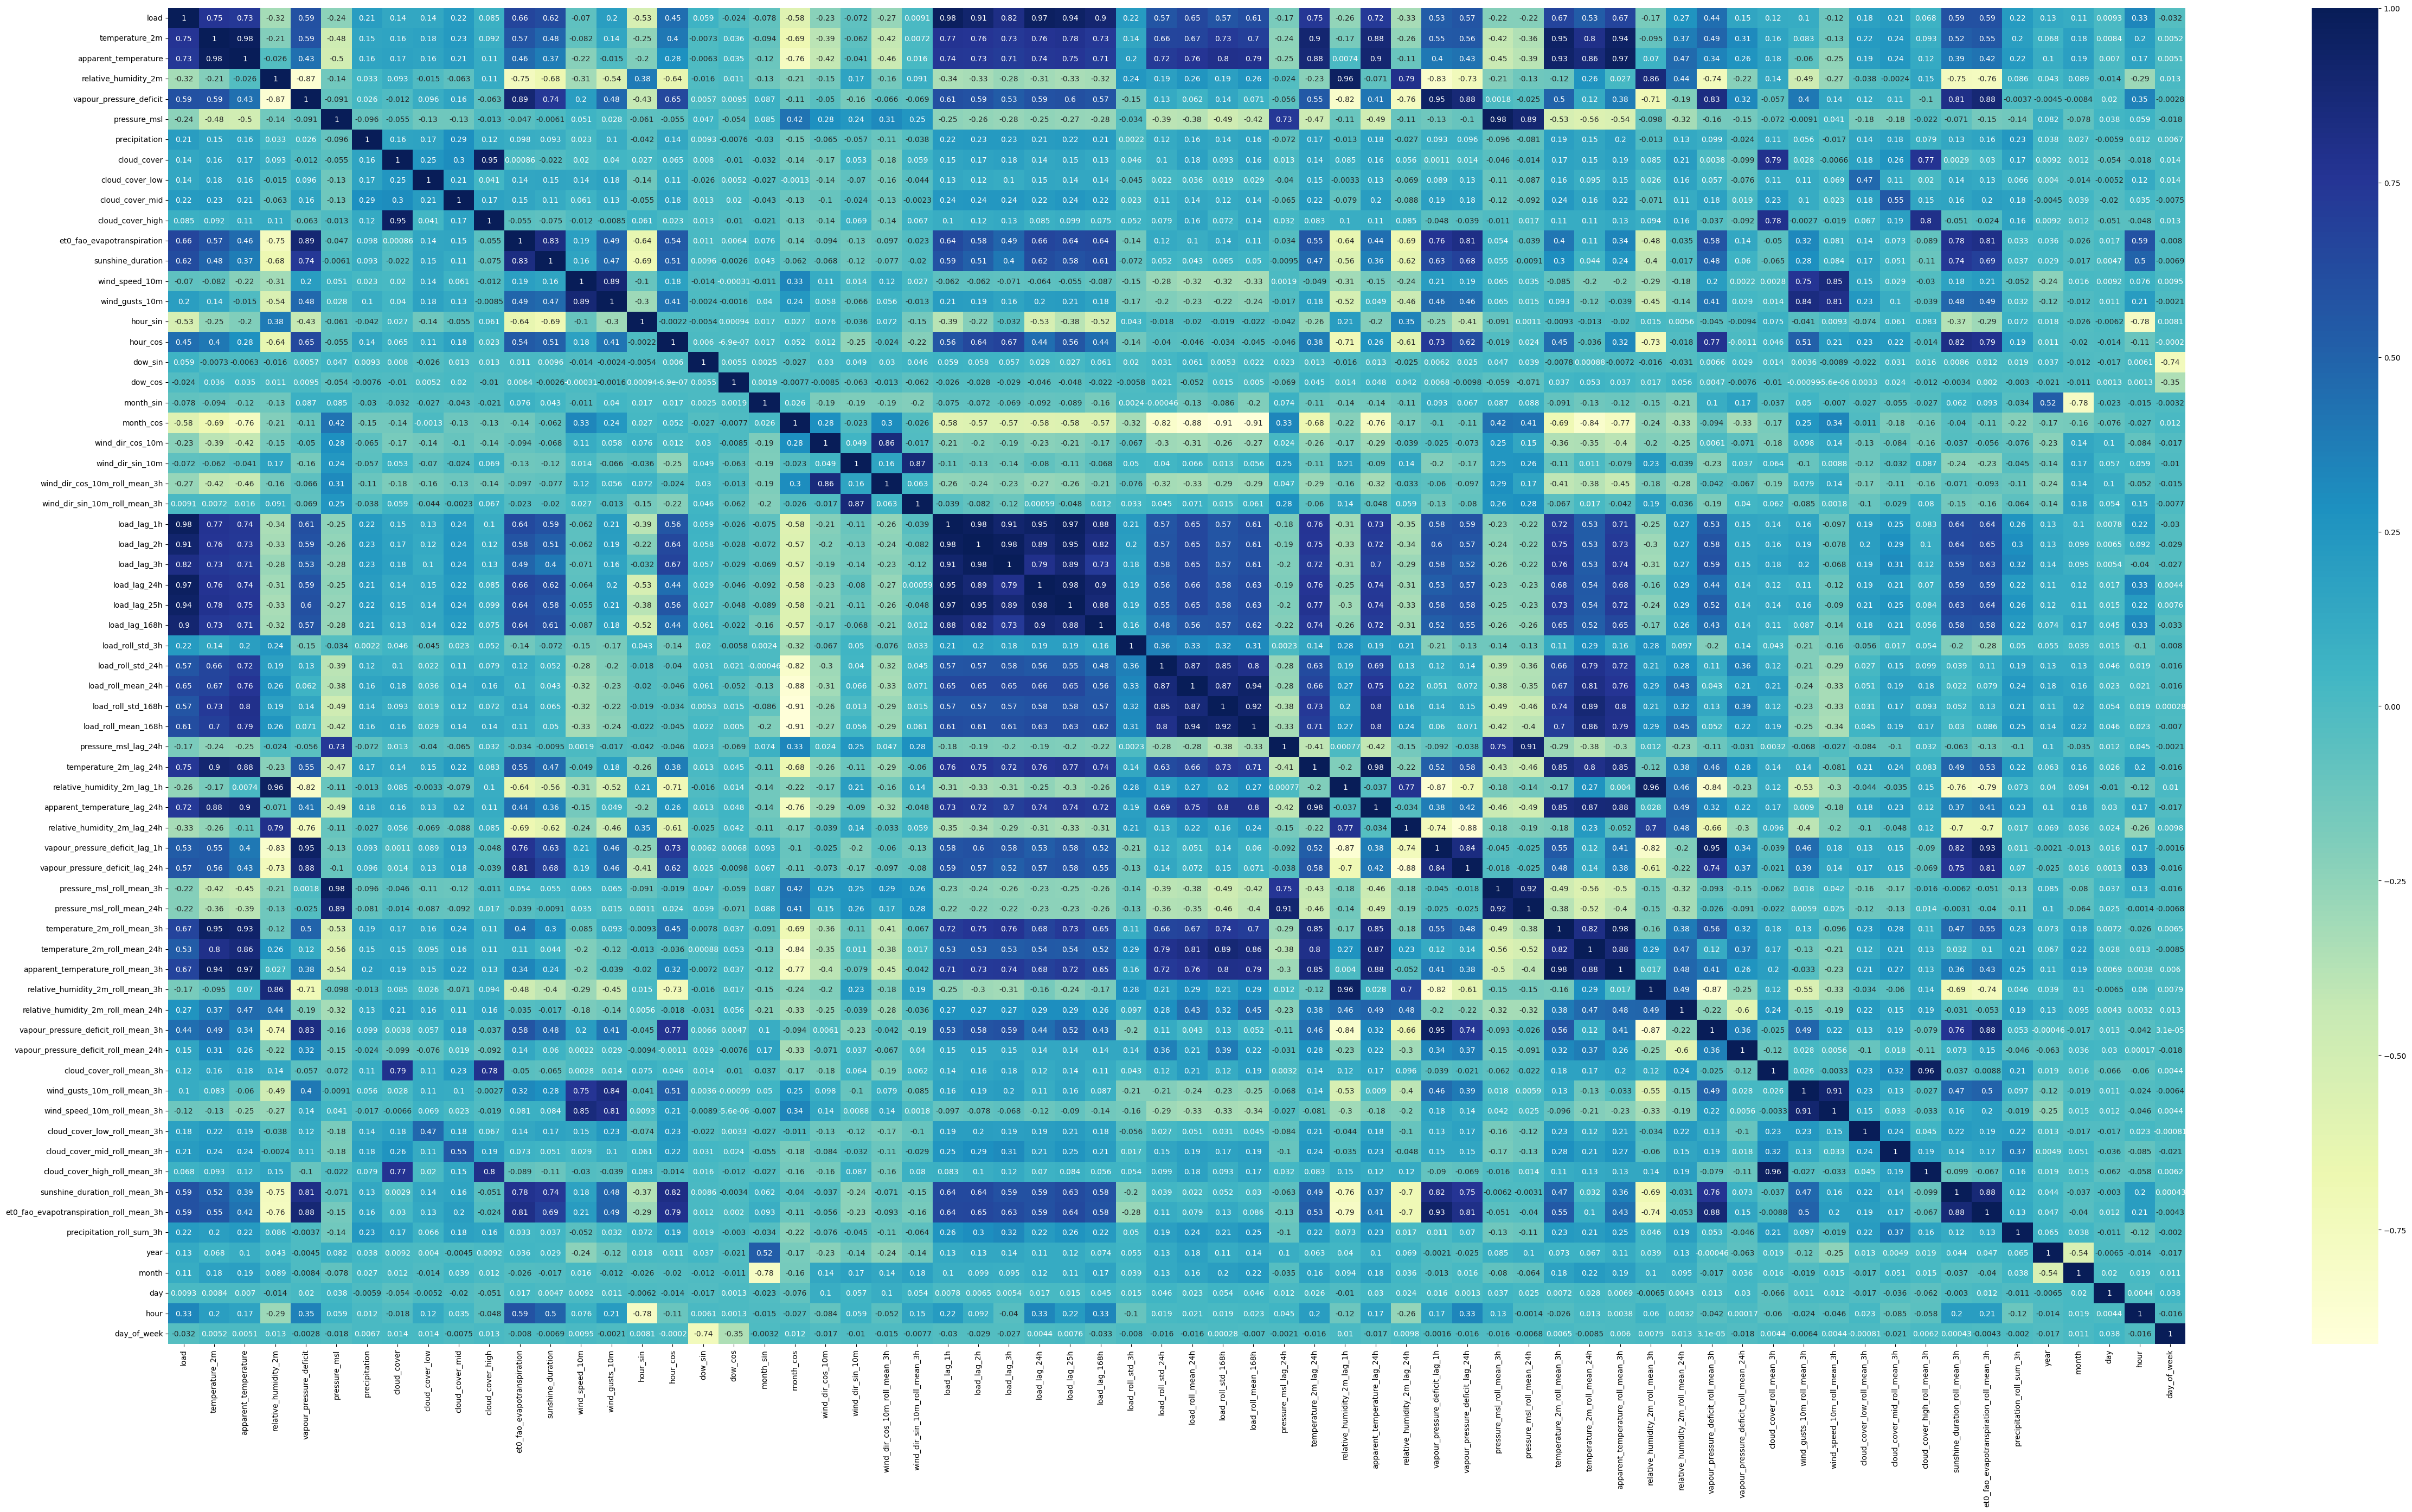

In [17]:
plt.figure(figsize=(60, 32))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [18]:
# Functions to shift and calculate rolling statistics
# min_periods=1 is used to let the rolling func compute values even if there are fewer data than 'window' observations
def past_mean(series, window):
    return series.shift(1).rolling(window, min_periods=1).mean()

def past_std(series, window):
    return series.shift(1).rolling(window, min_periods=1).std()
def past_sum(series, window):
    return series.shift(1).rolling(window, min_periods=1).sum()

In [19]:
# Shifting all the features to avoid data leakage
# Since we want the current row to only contain info from the past

# load-based
data['load_roll_std_3h']    = past_std(data['load'], 3)
data['load_roll_std_24h']   = past_std(data['load'], 24)
data['load_roll_std_168h']  = past_std(data['load'], 168)
data['load_roll_mean_24h']  = past_mean(data['load'], 24)
data['load_roll_mean_168h'] = past_mean(data['load'], 168)

# wind direction
data['wind_dir_cos_10m_roll_mean_3h'] = past_mean(data['wind_dir_cos_10m'], 3)
data['wind_dir_sin_10m_roll_mean_3h'] = past_mean(data['wind_dir_sin_10m'], 3)

# pressure & temperature
data['pressure_msl_roll_mean_3h']  = past_mean(data['pressure_msl'], 3)
data['pressure_msl_roll_mean_24h'] = past_mean(data['pressure_msl'], 24)
data['temperature_2m_roll_mean_3h']  = past_mean(data['temperature_2m'], 3)
data['temperature_2m_roll_mean_24h'] = past_mean(data['temperature_2m'], 24)

# apparent temp & humidity
data['apparent_temperature_roll_mean_3h']  = past_mean(data['apparent_temperature'], 3)
data['relative_humidity_2m_roll_mean_3h']  = past_mean(data['relative_humidity_2m'], 3)
data['relative_humidity_2m_roll_mean_24h'] = past_mean(data['relative_humidity_2m'], 24)

# VPD
data['vapour_pressure_deficit_roll_mean_3h']  = past_mean(data['vapour_pressure_deficit'], 3)
data['vapour_pressure_deficit_roll_mean_24h'] = past_mean(data['vapour_pressure_deficit'], 24)

# clouds/wind/sun
data['cloud_cover_roll_mean_3h']      = past_mean(data['cloud_cover'], 3)
data['cloud_cover_low_roll_mean_3h']  = past_mean(data['cloud_cover_low'], 3)
data['cloud_cover_mid_roll_mean_3h']  = past_mean(data['cloud_cover_mid'], 3)
data['cloud_cover_high_roll_mean_3h'] = past_mean(data['cloud_cover_high'], 3)
data['wind_gusts_10m_roll_mean_3h']   = past_mean(data['wind_gusts_10m'], 3)
data['wind_speed_10m_roll_mean_3h']   = past_mean(data['wind_speed_10m'], 3)
data['sunshine_duration_roll_mean_3h'] = past_mean(data['sunshine_duration'], 3)
data['et0_fao_evapotranspiration_roll_mean_3h'] = past_mean(data['et0_fao_evapotranspiration'], 3)

# precipitation (sum)
data['precipitation_roll_sum_3h'] = past_sum(data['precipitation'], 3)

# safe lag
data['load_lag_1h']   = data['load'].shift(1)
data['load_lag_2h']   = data['load'].shift(2)
data['load_lag_3h']   = data['load'].shift(3)
data['load_lag_24h']  = data['load'].shift(24)
data['load_lag_25h']  = data['load'].shift(25)
data['load_lag_168h'] = data['load'].shift(168)

data['pressure_msl_lag_24h']            = data['pressure_msl'].shift(24)
data['temperature_2m_lag_24h']          = data['temperature_2m'].shift(24)
data['relative_humidity_2m_lag_1h']     = data['relative_humidity_2m'].shift(1)
data['relative_humidity_2m_lag_24h']    = data['relative_humidity_2m'].shift(24)
data['vapour_pressure_deficit_lag_1h']  = data['vapour_pressure_deficit'].shift(1)
data['vapour_pressure_deficit_lag_24h'] = data['vapour_pressure_deficit'].shift(24)
data['apparent_temperature_lag_24h']    = data['apparent_temperature'].shift(24)


In [20]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10775 entries, 168 to 10942
Data columns (total 66 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   load                                     10775 non-null  float64
 1   temperature_2m                           10775 non-null  float64
 2   apparent_temperature                     10775 non-null  float64
 3   relative_humidity_2m                     10775 non-null  float64
 4   vapour_pressure_deficit                  10775 non-null  float64
 5   pressure_msl                             10775 non-null  float64
 6   precipitation                            10775 non-null  float64
 7   cloud_cover                              10775 non-null  float64
 8   cloud_cover_low                          10775 non-null  float64
 9   cloud_cover_mid                          10775 non-null  float64
 10  cloud_cover_high                         10775 no

In [21]:
from sklearn.model_selection import TimeSeriesSplit

# Quick check to see if the rolling calculations are correct
# and that no data leakage is present
check_one = data['load'].shift(1).rolling(24, min_periods=1).mean()
print("load_roll_mean_24h median abs diff:",
      (data['load_roll_mean_24h'] - check_one).abs().median())

check_two = data['precipitation'].shift(1).rolling(3, min_periods=1).sum()
print("precipitation_roll_sum_3h median abs diff:",
      (data['precipitation_roll_sum_3h'] - check_two).abs().median())

data = data.iloc[168:].reset_index(drop=True)

x = data.drop(['load'], axis=1)
y = data['load']


load_roll_mean_24h median abs diff: 0.0
precipitation_roll_sum_3h median abs diff: 0.0


In [22]:
# 4-fold with 1800 test size (hours, 10943 hours in dataset instead 16128 hours converts from 2 years) 
# and 168 gap (hours, prevent leakage due to roll over data)
tscv = TimeSeriesSplit(n_splits=4, test_size=1800, gap=168)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
scaler = StandardScaler()

avg_rmse = 0
avg_naive_rmse = 0

# enumerate give back the fold number and split() give back the train & test (list of indexes)
# start=1 to start fold count from 1 instead of 0
for fold, (train_index, test_index) in enumerate(tscv.split(x), start=1):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    x_train_s = scaler.fit_transform(x_train)
    x_test_s = scaler.transform(x_test)

    reg.fit(x_train_s, y_train)
    print(f"Fold #{fold}: {reg.score(x_test_s, y_test):.4f}\n")

    y_pred = reg.predict(x_test_s)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Linear Regression RMSE: {rmse:.4f}")

    baseline = y_test.copy()
    baseline.iloc[0] = y_train.iloc[-1]
    baseline.iloc[1:] = y_test.iloc[:-1].values
    baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline))
    print(f"Base Line Model RMSE: {baseline_rmse:.4f}\n")

    avg_rmse += rmse
    avg_naive_rmse += baseline_rmse

Fold #1: 0.9560

Linear Regression RMSE: 857.5060
Base Line Model RMSE: 1687.4605

Fold #2: 0.9705

Linear Regression RMSE: 636.8882
Base Line Model RMSE: 1096.1697

Fold #3: 0.9298

Linear Regression RMSE: 765.2673
Base Line Model RMSE: 1219.0754

Fold #4: 0.9683

Linear Regression RMSE: 765.0116
Base Line Model RMSE: 1578.1611



In [24]:
print(f"Average Linear Regression RMSE: {avg_rmse/4:.4f}")
print(f"Average Baseline Model RMSE: {avg_naive_rmse/4:.4f}")

Average Linear Regression RMSE: 756.1683
Average Baseline Model RMSE: 1395.2167
